# Corona Virus Exploratory Analysis and Modeling 

![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/news/2020/01_2020/coronavirus_1/1800x1200_coronavirus_1.jpg)

# 1. Import Library

In [1]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime
from time import gmtime, strftime
from pytz import timezone

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from wordcloud import WordCloud

# Image
import cv2
from PIL import Image
from IPython.display import display
from IPython.core.display import HTML

# np.random.seed(42)

%matplotlib inline

# Input data
print(os.listdir("../input/"))

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['corona-virus-time-series-dataset']


### Time of last edit

In [2]:
fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
pacific = timezone('US/Pacific')
loc_dt = datetime.datetime.now(pacific)
print("Pacific Time" + " : " + loc_dt.strftime(fmt))

Pacific Time : Fri, 06 March 2020 19:20:19 PST-0800


# 2. Read Data

In [3]:
input_dir = "../input/corona-virus-time-series-dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [4]:
time_series_covid_19_confirmed = pd.read_csv(input_dir + "time_series_19-covid-Confirmed.csv")
time_series_covid_19_recovered = pd.read_csv(input_dir + "time_series_19-covid-Recovered.csv")
time_series_covid_19_deaths = pd.read_csv(input_dir + "time_series_19-covid-Deaths.csv")

Lets see some data

In [5]:
# time_series_covid_19_confirmed.info()
time_series_covid_19_confirmed.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_confirmed.fillna("NA", inplace=True)
time_series_covid_19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
85,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
88,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1,1,1,1,1,3,5,12,12,17.0
125,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1.0
141,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2.0
120,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1.0


In [6]:
# time_series_covid_19_recovered.info()
time_series_covid_19_recovered.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_recovered.fillna("NA", inplace=True)
# time_series_covid_19_recovered.head()

In [7]:
# time_series_covid_19_deaths.info()
time_series_covid_19_deaths.sort_values(["Country/Region", "Province/State"], inplace=True)
# time_series_covid_19_deaths.fillna("NA", inplace=True)
time_series_covid_19_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20
85,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
88,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
125,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
141,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
120,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [8]:
columns = time_series_covid_19_confirmed.columns.tolist()
location_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
location_name_cols = ['Country/Region', 'Province/State']

data_cols = [c for c in columns if c not in location_columns]

last_day = time_series_covid_19_confirmed.columns[-1]

new_cols = location_name_cols.append(last_day)

In [9]:
last_confirm = time_series_covid_19_confirmed[location_name_cols]
last_confirm["Province/State"] = last_confirm["Province/State"].fillna("NA")
last_confirm.rename(columns = {last_day: "Confirm"}, inplace=True)
last_confirm["Confirm"] = last_confirm["Confirm"].fillna(0)
last_confirm["Confirm"] = last_confirm["Confirm"].astype('int64')


last_recovered = time_series_covid_19_recovered[location_name_cols]
last_recovered["Province/State"] = last_recovered["Province/State"].fillna("NA")
last_recovered.rename(columns = {last_day: "Recover"}, inplace=True)
last_recovered["Recover"] = last_recovered["Recover"].fillna(0)
last_recovered["Recover"] = last_recovered["Recover"].astype('int64')

last_death = time_series_covid_19_recovered[location_name_cols]
last_death["Province/State"] = last_death["Province/State"].fillna("NA")
last_death.rename(columns = {last_day: "Death"}, inplace=True)
last_death["Death"] = last_death["Death"].fillna(0)
last_death["Death"] = last_death["Death"].astype('int64')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [10]:
result1 = last_confirm.merge(last_recovered, on = ['Country/Region', 'Province/State'])
result = result1.merge(last_death, on = ['Country/Region', 'Province/State'])

In [11]:
country_list = result['Country/Region'].unique().tolist()
state_list = result['Province/State'].unique().tolist()

In [12]:
result_cont = result.groupby(['Country/Region']).sum()
display(HTML(result_cont.to_html()))

,Confirm,Recover,Death
Country/Region,,,
Afghanistan,1,0,0
Algeria,17,0,0
Andorra,1,0,0
Argentina,2,0,0
Armenia,1,0,0
Australia,60,21,21
Austria,55,0,0
Azerbaijan,6,0,0
Bahrain,60,4,4


# Visualization

In [13]:
total_confirm = time_series_covid_19_confirmed[last_day].sum()
total_recovered = time_series_covid_19_recovered[last_day].sum()
total_death = time_series_covid_19_deaths[last_day].sum()

df_total = pd.DataFrame({"Confirm": [total_confirm],
                         "Recover": [total_recovered],
                         "Death": [total_death]})
df_total.head()

,Confirm,Recover,Death
0,101800.0,55866.0,3460.0


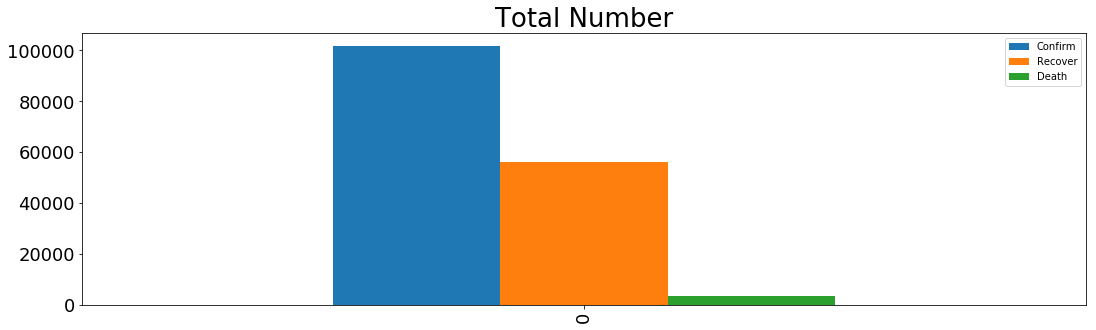

In [14]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number"

df_total.plot(kind="bar")
plt.title(title)
plt.show()

In [15]:
count_days_vis = {len(data_cols): "line", 30: "line", 15: "line", 7: "line", 3: "line"}

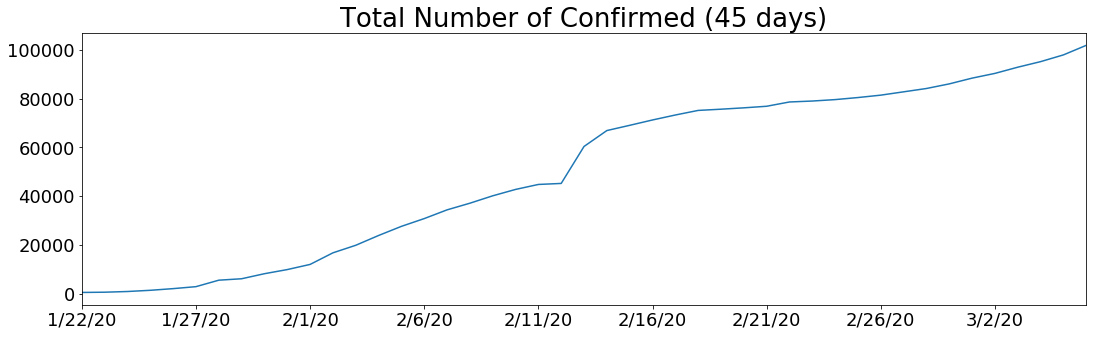

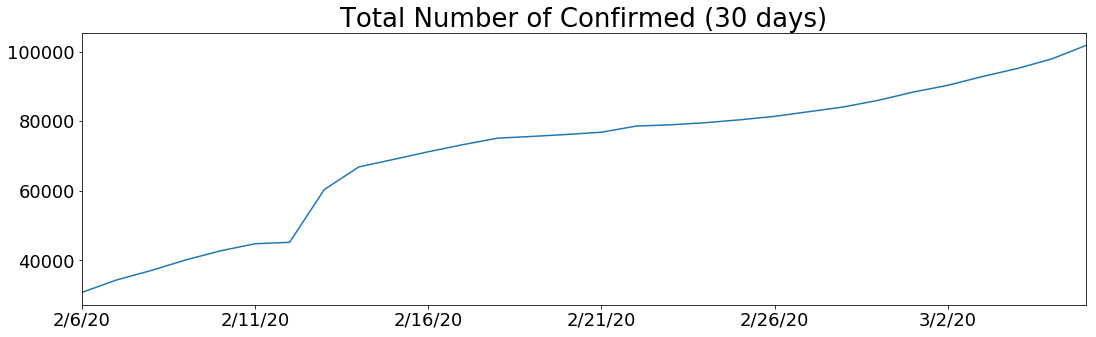

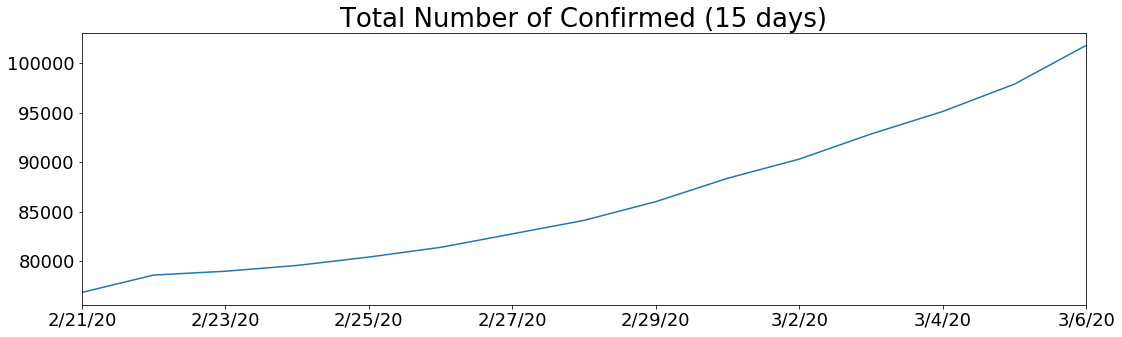

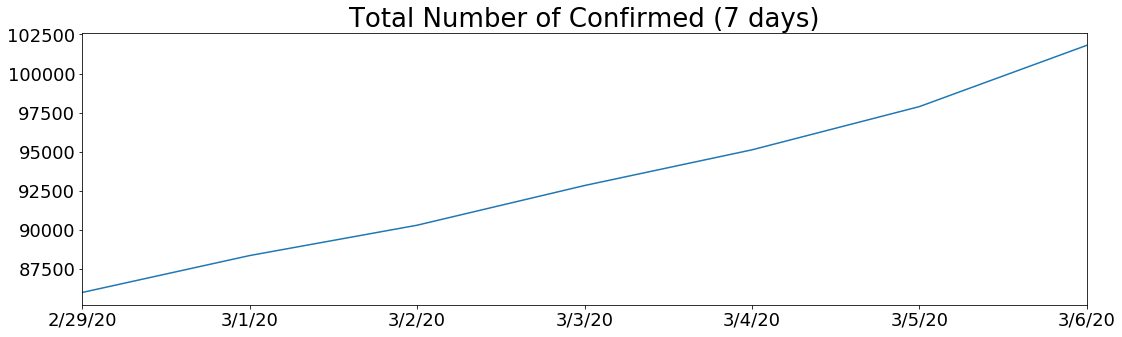

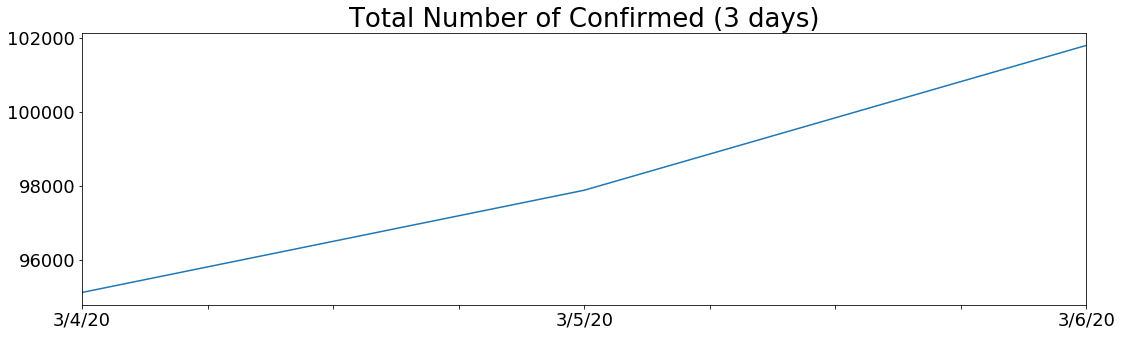

In [16]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = time_series_covid_19_confirmed
title_key = " Confirmed "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

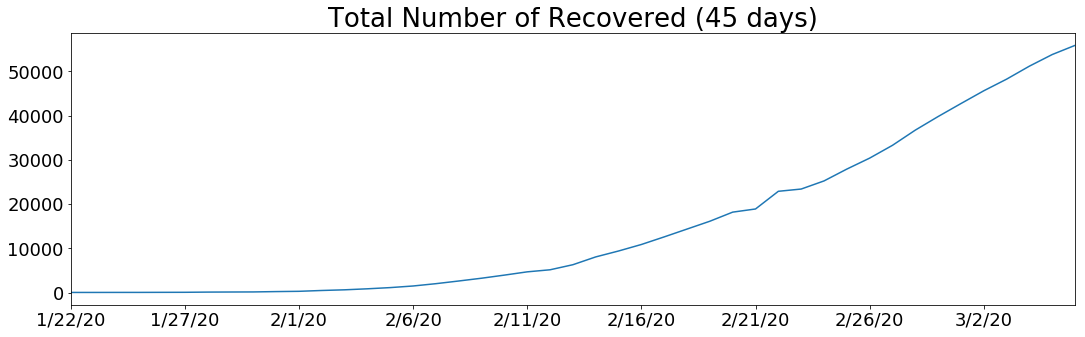

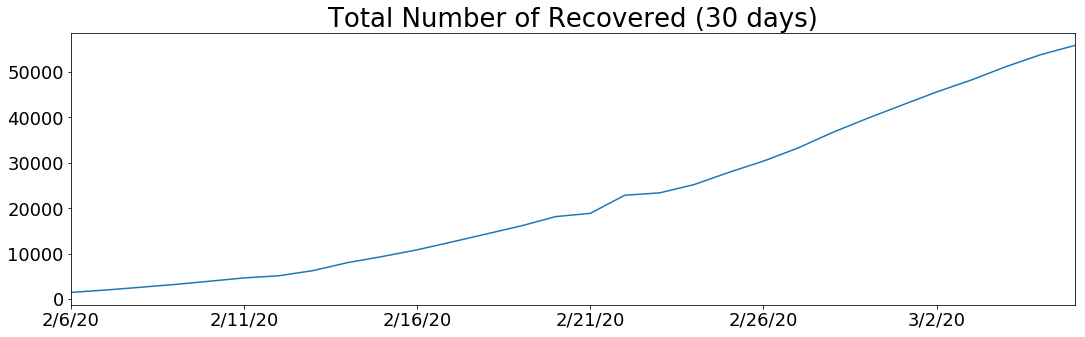

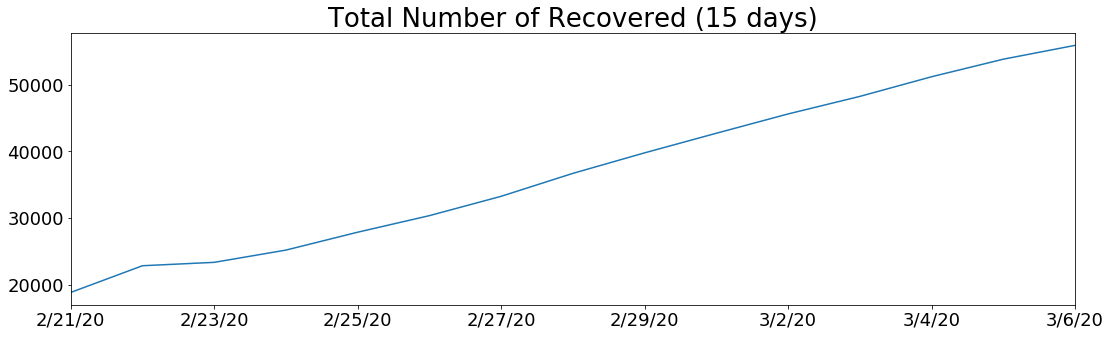

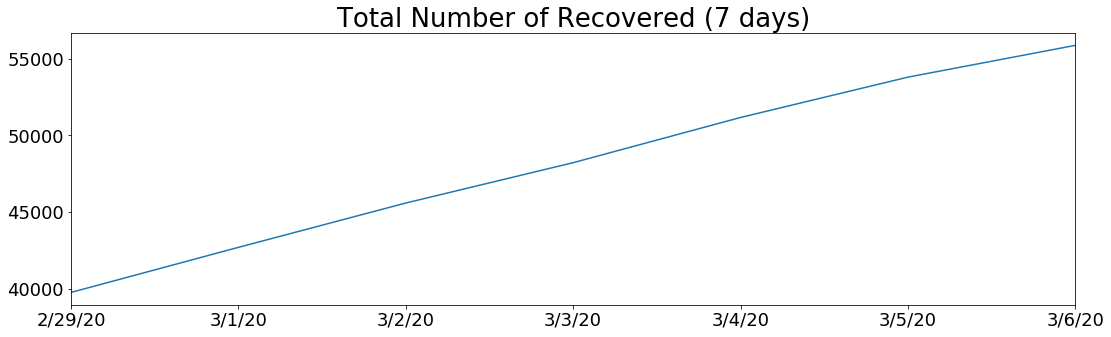

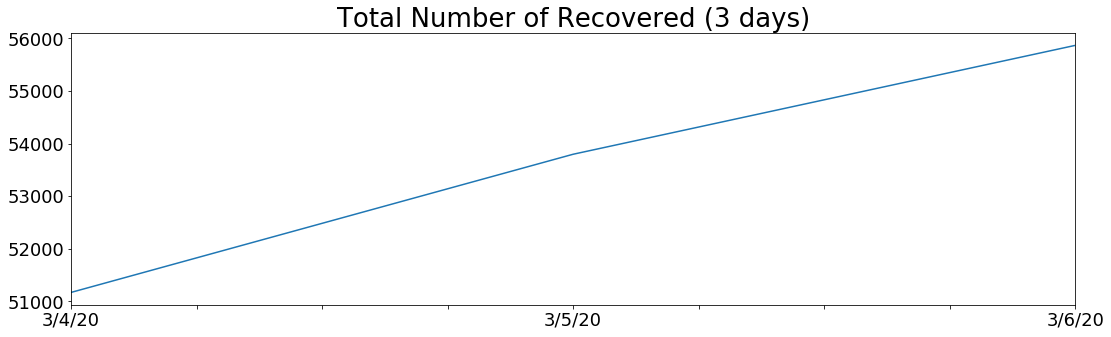

In [17]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = time_series_covid_19_recovered
title_key = " Recovered "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

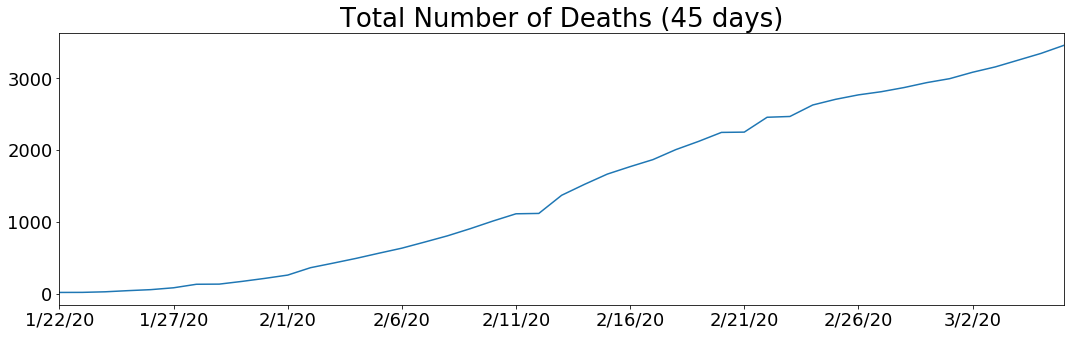

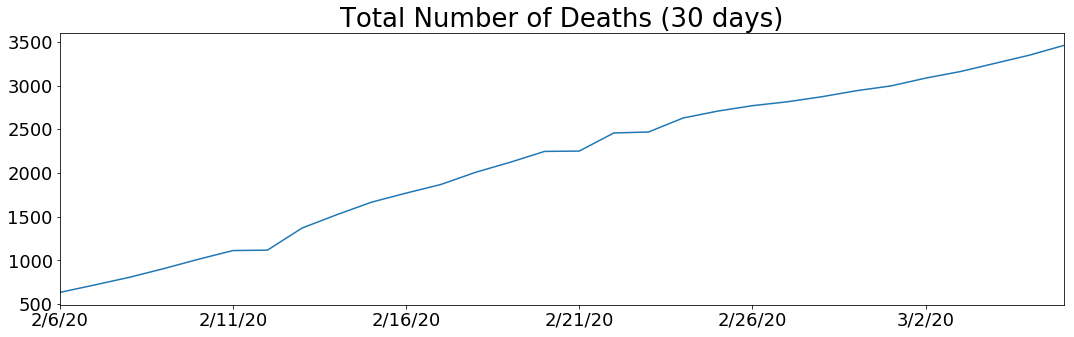

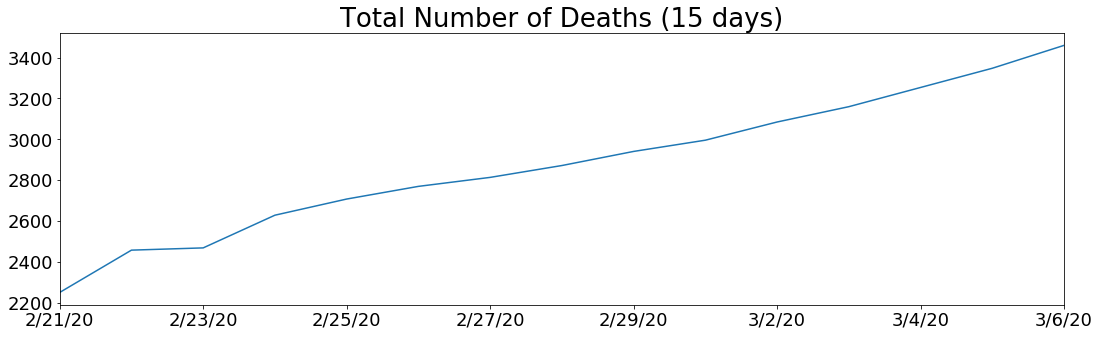

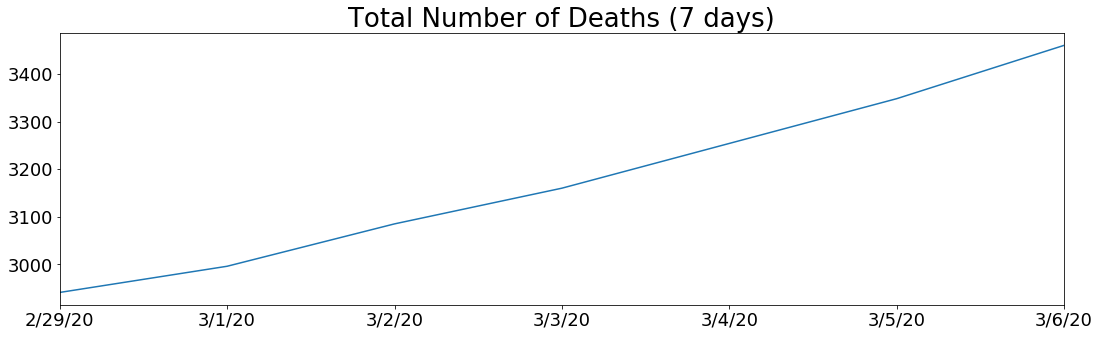

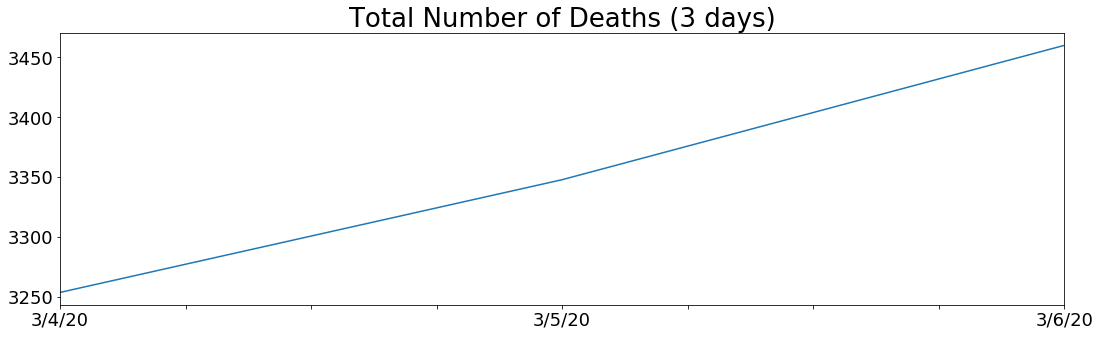

In [18]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


df = time_series_covid_19_deaths
title_key = " Deaths "
title_text = "Total Number of" + title_key + "("


for count_days_now in count_days_vis:
    title = title_text + str(count_days_now) + " days)" 
    df[data_cols[-count_days_now:]].sum().plot(kind=count_days_vis[count_days_now])
    plt.title(title)
    plt.show()

In [19]:
# ticksize = 18
# titlesize = ticksize + 8
# labelsize = ticksize + 5

# figsize = (18, 5)
# params = {'figure.figsize' : figsize,
#           'axes.labelsize' : labelsize,
#           'axes.titlesize' : titlesize,
#           'xtick.labelsize': ticksize,
#           'ytick.labelsize': ticksize}

# # plt.xticks(rotation=90)

# i = 0
# for index, row in country_stat_pd.iterrows():
#     if row["Confirm"]>10 or row["Recovered"]>1 or row["Death"]>1:
#         row.plot(kind ="bar")
#         plt.title(index)
#         plt.show()
#         i+=1

In [20]:
# from mpl_toolkits.basemap import Basemap

# plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
# m.bluemarble(scale=0.5);


In [21]:
# # cities = pd.read_csv('data/california_cities.csv')

# df = time_series_covid_19_confirmed
# # Extract the data we're interested in
# lat = df['Lat'].values
# lon = df['Long'].values
# confirm_last = df[last_day].values
# # area = cities['area_total_km2'].values

In [22]:
# # 1. Draw the map background
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='h', 
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# # 2. scatter city data, with color reflecting population
# # and size reflecting area
# m.scatter(lon, lat, latlon=True,
#           c=np.log10(population),
#           cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');